# Run Mayonnaise

-> automatic way to initialize data for HD 120326 (in progress)

-> updated until 20/01/2020

-> Modified: 2022-11-03, for the Sco-Cen debris disk. However, the jupyter crashes at the command:

    algo = mayo_hci.all_ADI_sequence_mayonnaise_pipeline(working_dir)

## Initialization

In [3]:
from hciplot import plot_frames as plots
import matplotlib.pyplot as plt
import numpy as np
import vip_hci as vip
import sys
import json
sys.path.append('../../')   # append the path to mayo_hci
import mayo_hci
import pandas as pd

#### Display the list of the data:

In [4]:
# Initialize the path to the wished data 
# -> supposed to be changed accordingly to the data/computer used
infolder = '/Users/desgranc/Documents/work/projects/HD120326/data/'
dF       = pd.read_csv(infolder + 'list_obs.txt',sep='\t')
dF.tail()

,target,epoch,instrument,filter,polar,quality,seeing,tau0,delta_pa,PI
1,HD_120326,2016-06-04,IRDIS,no,H23,good,0.71,3.1,22,Hinkley & Matthews
2,HD_120326,2016-06-13,IRDIS,no,J23,to check,to check,to check,NaN,GTO
3,HD_120326,2018-06-01,IRDIS,yes,BB_H,very good,0.45,4.2,Boccaletti,NaN
4,HD_120326,2019-06-26,IRDIS,no,BB_H,very bad,1.84,2.4,36,Bonnefoy & Ménard
5,HD_120326,2019-07-09,IRDIS,no,BB_H,very good,0.54,3.1,58,Bonnefoy & Ménard


In [5]:
# Choose the target that you wish to reduce the data
i_object = 5
name_object = dF['target'].iloc[i_object] ; epoch = dF['epoch'].iloc[i_object] 
instru = dF['instrument'].iloc[i_object] ; band = dF['filter'].iloc[i_object]
algorithm = 'MAYO'

working_dir = infolder + 'reduced/' + algorithm + '/' + epoch + '/' + instru + '/'
saving_dir  = working_dir + 'run1/'
namesave    = '{}_{}_{}_{}_{}'.format(name_object,algorithm,instru,band,epoch)

# Create directories if they do not exist
os.makedirs(working_dir,exist_ok=True)
#os.makedirs(saving_dir,exist_ok=True)

print('working directory:', working_dir)
print('saving directory:' , saving_dir)
print('name save:' , namesave + '_blabla', '\n')

with open(working_dir+'parameters_algo.json', 'r') as read_file_parameters_algo:
    parameters_algo = json.load(read_file_parameters_algo)

print(parameters_algo)

working directory: /Users/desgranc/Documents/work/projects/HD120326/data/reduced/MAYO/2019-07-09/IRDIS/
saving directory: /Users/desgranc/Documents/work/projects/HD120326/data/reduced/MAYO/2019-07-09/IRDIS/run1/
name save: HD_120326_MAYO_IRDIS_no_2019-07-09_blabla 

{'data_name': '2019-07-09/IRDIS', 'data_path': '/Users/desgranc/Documents/work/projects/HD120326/data/reduced/MAYO/', 'channel': 0, 'crop': 256, 'min_objective': 'huber_loss', 'conv': True, 'rank': 1, 'tol': 1e-05, 'max_iter': 5000, 'convex_formulation': True, 'greedy_n_iter': 10, 'greedy_n_iter_in_rank': 5, 'greedy_mask': 8, 'mask_center': 8, 'sparseBasis': 'shearlets', 'scales': 4, 'regularization': 'constraint', 'regularization_disk': 20000, 'regularization_planet': 0, 'exact_gradient': True, 'center_image': [127, 127]}


#### Add an axis to the dataset cube

In [4]:
fn = '/inputs/ird_convert_recenter_dc2021-IRD_SCIENCE_REDUCED_MASTER_CUBE-center_im.fits'
cube, header = vip.fits.open_fits(parameters_algo['data_path']+parameters_algo['data_name']+fn,header=True)

Fits HDU-0 data and header successfully loaded. Data shape: (2, 56, 1024, 1024)


In [5]:
cube_add_axis = np.array([cube])
vip.fits.write_fits(parameters_algo['data_path']+parameters_algo['data_name']+'/cube_add_axis.fits', cube_add_axis, header=header, verbose=False)

In [1]:
#help(super)

## Run GreeDS

GreeDS corresponds to the first guess given to Mayo.

In [2]:
algo = mayo_hci.all_ADI_sequence_mayonnaise_pipeline(working_dir)

NameError: name 'mayo_hci' is not defined

In [4]:
help(mayo_hci.all_ADI_sequence_mayonnaise_pipeline)

Help on class all_ADI_sequence_mayonnaise_pipeline in module mayo_hci.mayonnaise:

class all_ADI_sequence_mayonnaise_pipeline(mayonnaise_pipeline)
 |  all_ADI_sequence_mayonnaise_pipeline(working_dir)
 |  
 |  Main instance of MAYO, solves optimization problem 27 from Pairet etal 2020
 |  
 |  Method resolution order:
 |      all_ADI_sequence_mayonnaise_pipeline
 |      mayonnaise_pipeline
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, working_dir)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  define_optimization_function(self)
 |  
 |  mayonnaise_pipeline_initialisation(self)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from mayonnaise_pipeline:
 |  
 |  check_LLT_smallerOne(self, n_tests)
 |      Check that the norm of LL_T is smaller than 1/(delta gamma), see PD3O from Yan 2018 for details.
 |  
 |  check_M_positive_semidefinite(self, n_tests)
 |      The matrix

In [3]:
import mayo_hci

292
292


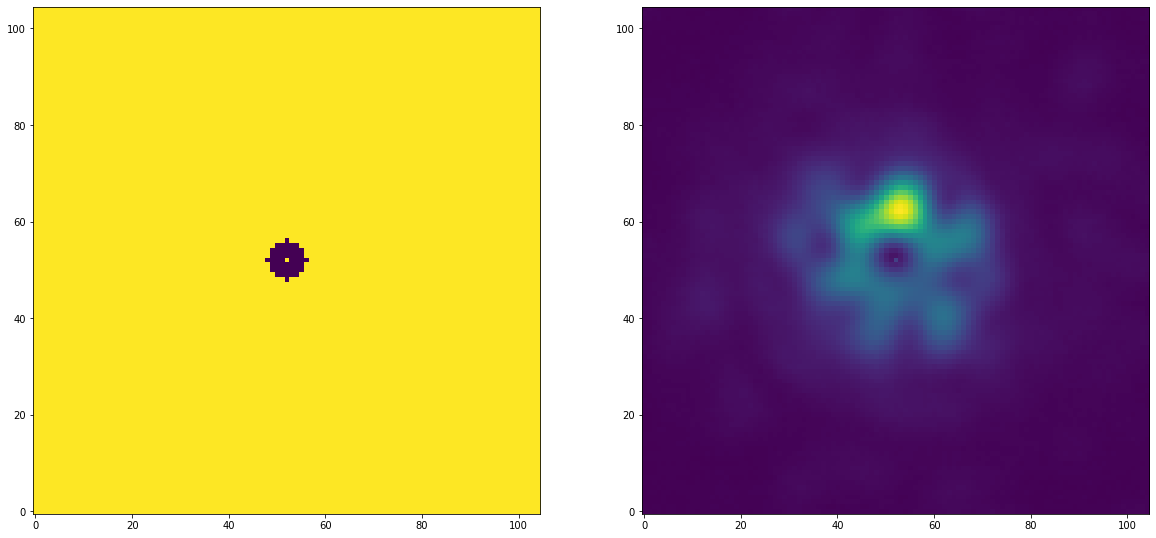

In [52]:
rotation_center_and_mask, data_overlay_rotation_center_and_mask = algo.get_rotation_and_mask_info()
fig,ax = plt.subplots(1,2,figsize=(20,10))
crop=240
ax[0].imshow(rotation_center_and_mask[crop:-crop,crop:-crop],origin='lower')
ax[1].imshow(data_overlay_rotation_center_and_mask[crop:-crop,crop:-crop],origin='lower')
plt.savefig('{}_centrage_292_292_2.png'.format(name_object))

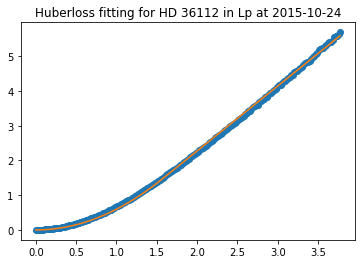

In [53]:
plt.plot(algo.negative_log_hist_x,algo.negative_log_hist_y,'o')
delta = algo.fitted_pw[0]
c = algo.fitted_pw[1]
fitted_huber = mayo_hci.operators.compute_huber_loss(algo.negative_log_hist_x,delta,c)
plt.title('Huberloss fitting for {} in {} at {}'.format(name_object.replace('_',' '),band,epoch))
plt.plot(algo.negative_log_hist_x,fitted_huber)
plt.savefig(saving_dir + namesave + '_huberloss2.png')

## Solve optimisation 

#### Quicker way: 

when one knows the optimal constraints to put on the disc and planet. 
These constraints have to be indicated in the .json file as: "regularization_disk" and "regularization_planet".

In [6]:
algo.solve_optim()

print('Optimization ends\n\n:)\n\n')

vip.fits.write_fits(saving_dir+namesave+'_disc.fits',algo.X[0],verbose=False)
vip.fits.write_fits(saving_dir+namesave+'_planet.fits',algo.X[1],verbose=False)
vip.fits.write_fits(saving_dir+namesave+'_disc_planet.fits',algo.X[0]+algo.X[1],verbose=False)
vip.fits.write_fits(saving_dir+namesave+'_res.fits',algo.noisy_disk_planet - algo.conv_op(algo.X[0] + algo.X[1]),verbose=False)

np.savetxt(saving_dir+namesave+'_list_convergence.txt',np.array(algo.convergence))


print('All the files saved here: {} \n\n:)\n\n'.format(saving_dir))

#### Longer way: 

when one wants to try different constraints for disk or planet lifespace.

In [13]:
list_constraint_disk = np.linspace(50000,16000,5) # a decommenter la deuxieme fois
planet_constraint = 300

list_planet = np.zeros((len(list_constraint_disk),algo.n,algo.n))
list_disk = np.zeros((len(list_constraint_disk),algo.n,algo.n))
list_d_p = np.zeros((len(list_constraint_disk),algo.n,algo.n))
list_residuals = np.zeros((len(list_constraint_disk),algo.n,algo.n))
AC_score_residuals = np.zeros(len(list_constraint_disk))

list_convergence = []

In [ ]:
print('Optimization begins')
for i, disk_constraint in enumerate(list_constraint_disk):
    print('Disk constraint',disk_constraint)
    params_d_p =  str(disk_constraint) + '_' + str(planet_constraint) 
    algo.set_disk_regularization_parameter(disk_constraint)
    n_iter_mca = 300
    while not algo.parameters_algo['stop-optim']:
        algo.mayonnaise_pipeline_iteration()
        if algo.n_iter%10 == 0 and n_iter_mca>0:
            algo.internal_MCA_mayonnaise_pipeline_iteration(n_iter_mca)
            n_iter_mca -= algo.n_iter
        
        # Save premilenary files
        if (algo.n_iter-1) < 50 :
            algo.residuals = algo.noisy_disk_planet - algo.conv_op(algo.X[0] + algo.X[1])
            
            print('\nFor disk constraint',disk_constraint,'and at iteration', algo.n_iter, 'the convergence is', algo.convergence[algo.n_iter-1])
            print('saving files')
            str_iter = '_iter' + str(algo.n_iter)
            vip.fits.write_fits(saving_dir + params_d_p + str_iter + '_x_d.fits',algo.X[0],verbose=False)
            vip.fits.write_fits(saving_dir + params_d_p + str_iter + '_x_p.fits',algo.X[1],verbose=False)
            vip.fits.write_fits(saving_dir + params_d_p + str_iter + '_x_d_p.fits',algo.X[0]+algo.X[1],verbose=False)
            vip.fits.write_fits(saving_dir + params_d_p + str_iter + '_x_res',algo.residuals,verbose=False)


        elif (algo.n_iter-1)%1000 == 0 :
            algo.residuals = algo.noisy_disk_planet - algo.conv_op(algo.X[0] + algo.X[1])
            
            print('\nFor disk constraint',disk_constraint,'and at iteration', algo.n_iter, 'the convergence is', algo.convergence[algo.n_iter-1])
            print('saving files')
            str_iter = '_iter' + str(algo.n_iter)
            vip.fits.write_fits(saving_dir + params_d_p + str_iter + '_x_d.fits',algo.X[0],verbose=False)
            vip.fits.write_fits(saving_dir + params_d_p + str_iter + '_x_p.fits',algo.X[1],verbose=False)
            vip.fits.write_fits(saving_dir + params_d_p + str_iter + '_x_d_p.fits',algo.X[0]+algo.X[1],verbose=False)
            vip.fits.write_fits(saving_dir + params_d_p + str_iter + '_x_res',algo.residuals,verbose=False)

    algo.residuals = algo.noisy_disk_planet - algo.conv_op(algo.X[0] + algo.X[1])
    
    list_disk[i,:,:]   = np.copy(algo.X[0])
    list_planet[i,:,:] = np.copy(algo.X[1])
    list_d_p[i,:,:]    = list_disk[i,:,:] + list_planet[i,:,:]
    list_residuals[i, :, :] = np.copy(algo.residuals)
    list_convergence.append(algo.convergence)
    
    # save files as single images in .fits
    print('\nOptimization for disk constraint',disk_constraint,'finished at iteration',algo.n_iter, ' with a convergence of', algo.convergence[algo.n_iter-1])
    print('saving files')
    vip.fits.write_fits(saving_dir + '{}_disc_{}.fits'.format(namesave,params_d_p), algo.X[0],verbose=False)
    vip.fits.write_fits(saving_dir + '{}_planet_{}.fits'.format(namesave,params_d_p), algo.X[1],verbose=False)
    vip.fits.write_fits(saving_dir + '{}_global_{}.fits'.format(namesave,params_d_p), algo.X[0]+algo.X[1],verbose=False)
    vip.fits.write_fits(saving_dir + '{}_res_{}.fits'.format(namesave,params_d_p), algo.residuals,verbose=False)
    np.savetxt(saving_dir + '{}_list_convergence_{}.txt'.format(namesave,params_d_p),np.array(list_convergence[i]))

    algo.n_iter = 0
    algo.convergence *= 0
    algo.parameters_algo['stop-optim'] = False
    
print('Optimization ends\n\n:)\n\n')


vip.fits.write_fits(saving_dir+'{}_disc.fits'.format(namesave),list_disk,verbose=False)
vip.fits.write_fits(saving_dir+'{}_planet.fits'.format(namesave),list_planet,verbose=False)
vip.fits.write_fits(saving_dir+'{}_global.fits'.format(namesave),list_d_p,verbose=False)
vip.fits.write_fits(saving_dir+'{}_res.fits'.format(namesave),list_residuals,verbose=False)

np.savetxt(saving_dir+namesave+'_list_disk_constraint.txt',np.array([list_constraint_disk]),fmt='%.2f')
np.savetxt(saving_dir+namesave+'_list_constraint_planet.txt',np.array([planet_constraint]),fmt='%.2f')
np.savetxt(saving_dir+namesave+'_list_convergence.txt',np.array(list_convergence))


print('All the files saved here: {} \n\n:)\n\n'.format(saving_dir))

Optimization begins
Disk constraint 22000.0


/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)


 at iteration 1, convergence is 6.83280e-02
For disk constraint 22000.0 and at iteration 1 the convergence is 0.06832801023508653
saving files
 at iteration 1001, convergence is 3.84333e-03performing 20/20 iterations of MCA.A.
For disk constraint 22000.0 and at iteration 1001 the convergence is 0.003843332816307554
saving files
 at iteration 2001, convergence is 2.70056e-03
For disk constraint 22000.0 and at iteration 2001 the convergence is 0.0027005594255508935
saving files
 at iteration 3001, convergence is 2.19262e-03
For disk constraint 22000.0 and at iteration 3001 the convergence is 0.0021926244254674384
saving files
 at iteration 4001, convergence is 1.88916e-03
For disk constraint 22000.0 and at iteration 4001 the convergence is 0.0018891602766133032
saving files
 at iteration 5000, convergence is 1.68296e-03
Optimization for disk constraint 22000.0 finished at iteration 5000  with a convergence of 0.0016829606933949752
saving files
Disk constraint 20500.0
 at iteration 1, con